In [1]:
# Import Pandas
import pandas as pd

#Import the historical MN state level data from the COVID Tracking Project
url="https://covidtracking.com/api/v1/states/mn/daily.csv"
MNCovid=pd.read_csv(url)

In [2]:
#Create a new column for the test positivity rate
MNCovid["positiveRate"] = MNCovid["positiveIncrease"] / MNCovid["totalTestResultsIncrease"]

In [3]:
#Create a new column for 7 day average of tests completed
MNCovid['newTests7Day'] = MNCovid.iloc[:,30].rolling(window=7).mean()

In [4]:
#Create a new column for 7 day average of positive test results
MNCovid['newPositive7Day'] = MNCovid.iloc[:,26].rolling(window=7).mean()

In [5]:
#Create a new column for 7 day average of positive test rate
MNCovid['positiveRate7Day'] = MNCovid['newPositive7Day'] / MNCovid['newTests7Day']

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Convert the dates column from a string into a datetime object
MNCovid['dateTime'] = pd.to_datetime(MNCovid['date'].astype(str), format='%Y%m%d')

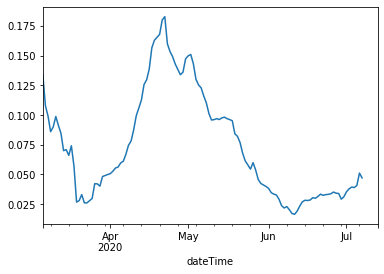

In [11]:
#Plot 7 days average of positivity rate as a line plot
MNCovid.set_index('dateTime')['positiveRate7Day'].plot();

In [12]:

MNCovid.to_csv('MNCovid.csv', index=False)

In [13]:
MNCovid[-7:]

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,negativeRegularScore,negativeScore,positiveScore,score,grade,positiveRate,newTests7Day,newPositive7Day,positiveRate7Day,dateTime
123,20200312,MN,43,307,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,0.196429,388.000000,35.428571,0.091311,2020-03-12
124,20200311,MN,21,217,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,0.105263,339.857143,33.571429,0.098781,2020-03-11
125,20200310,MN,11,132,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,0.103448,276.142857,24.857143,0.090016,2020-03-10
126,20200309,MN,5,80,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,0.085714,209.285714,18.000000,0.086007,2020-03-09
127,20200308,MN,2,48,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,126.714286,12.571429,0.099211,2020-03-08
128,20200307,MN,2,48,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,0.076923,80.857143,8.714286,0.107774,2020-03-07
129,20200306,MN,1,36,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,44.714286,6.000000,0.134185,2020-03-06
